In [1]:
import pandas as pd
import numpy as np
import io
import os
import datetime 
import easygui

In [2]:
files = os.listdir("CBS")
files

['14_holding_procedures.pdf',
 'A320 321 FCTM Flight Crew Training Manual.pdf',
 'ABCD-FE-01-00 Flight Envelope - v1 08.03.16.docx',
 'ABCD-FL-57-00 - Wing Load Calculation - v1 08.03.16.docx',
 'ABCD-WB-08-00 Weight and Balance Report - v1 08.03.16.docx',
 'AERO_Q406.pdf',
 'BendixKing KLN 89B.pdf',
 'Compasses.ppt',
 'Compasses.pptx',
 'DO-178B.pdf',
 'Embraer_190-Automatic_Flight_System.pdf',
 'Fa12_ppt_DataComm.pptx',
 'Falcon 20_Recurrent Manual.pdf',
 'Falcon_7X-Air_Cond_and_Press.pdf',
 'G200_JOEB_Report.pdf',
 'GA_Proc.pdf',
 'gulfstream_breakfast_minutes_111408.pdf',
 'missed_approach.pptx',
 'Principal Stresses.xlsx',
 'Scott Messner, An Overview of RTCA DO-178B.pptx',
 'waypoints.xls']

In [3]:
print(len(files))

21


In [4]:
filenames = []
extensions = []
for i in range(len(files)):
    temp = []
    for j in range(len(files[i])):
        temp.append(files[i][j])
    temp.reverse()
    temp = ''.join(temp)
    x = temp.split('.',1)
    y1 = x[0]
    y2 = x[1]
    temp1 = []
    temp2 = []
    for j in range(len(y1)):
        temp2.append(y1[j])
    for j in range(len(y2)):
        temp1.append(y2[j])
    temp1.reverse()
    temp2.reverse()
    filenames.append(''.join(temp1))
    extensions.append(''.join(temp2))
print(len(extensions))
print(extensions)
print(filenames)

21
['pdf', 'pdf', 'docx', 'docx', 'docx', 'pdf', 'pdf', 'ppt', 'pptx', 'pdf', 'pdf', 'pptx', 'pdf', 'pdf', 'pdf', 'pdf', 'pdf', 'pptx', 'xlsx', 'pptx', 'xls']
['14_holding_procedures', 'A320 321 FCTM Flight Crew Training Manual', 'ABCD-FE-01-00 Flight Envelope - v1 08.03.16', 'ABCD-FL-57-00 - Wing Load Calculation - v1 08.03.16', 'ABCD-WB-08-00 Weight and Balance Report - v1 08.03.16', 'AERO_Q406', 'BendixKing KLN 89B', 'Compasses', 'Compasses', 'DO-178B', 'Embraer_190-Automatic_Flight_System', 'Fa12_ppt_DataComm', 'Falcon 20_Recurrent Manual', 'Falcon_7X-Air_Cond_and_Press', 'G200_JOEB_Report', 'GA_Proc', 'gulfstream_breakfast_minutes_111408', 'missed_approach', 'Principal Stresses', 'Scott Messner, An Overview of RTCA DO-178B', 'waypoints']


In [5]:
pdf = []
docxx = []
pptxz = []
xlsx = []
xls = []
for i in range(len(filenames)):
    if(extensions[i]=='pdf'):
        pdf.append(files[i])
    elif(extensions[i]=='docx'):
        docxx.append(files[i])
    elif(extensions[i]=='pptx'):
        pptxz.append(files[i])
    elif(extensions[i]=='xlsx'):
        xlsx.append(files[i])
    elif(extensions[i]=='xls'):
        xls.append(files[i])
print('Word: ',docxx)

Word:  ['ABCD-FE-01-00 Flight Envelope - v1 08.03.16.docx', 'ABCD-FL-57-00 - Wing Load Calculation - v1 08.03.16.docx', 'ABCD-WB-08-00 Weight and Balance Report - v1 08.03.16.docx']


In [6]:
awlfiles=[]
awlfiles.append(docxx)
awlfiles.append(pdf)
awlfiles.append(pptxz)
awlfiles.append(xlsx)
awlfiles.append(xls)
awlfiles

[['ABCD-FE-01-00 Flight Envelope - v1 08.03.16.docx',
  'ABCD-FL-57-00 - Wing Load Calculation - v1 08.03.16.docx',
  'ABCD-WB-08-00 Weight and Balance Report - v1 08.03.16.docx'],
 ['14_holding_procedures.pdf',
  'A320 321 FCTM Flight Crew Training Manual.pdf',
  'AERO_Q406.pdf',
  'BendixKing KLN 89B.pdf',
  'DO-178B.pdf',
  'Embraer_190-Automatic_Flight_System.pdf',
  'Falcon 20_Recurrent Manual.pdf',
  'Falcon_7X-Air_Cond_and_Press.pdf',
  'G200_JOEB_Report.pdf',
  'GA_Proc.pdf',
  'gulfstream_breakfast_minutes_111408.pdf'],
 ['Compasses.pptx',
  'Fa12_ppt_DataComm.pptx',
  'missed_approach.pptx',
  'Scott Messner, An Overview of RTCA DO-178B.pptx'],
 ['Principal Stresses.xlsx'],
 ['waypoints.xls']]

In [7]:
import re
from collections import Counter

def viterbi_segment(text):
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower())
dictionary = Counter(words(open('words.txt').read()))
max_word_length = max(map(len, dictionary))
total = float(sum(list(dictionary.values())))

WORD FILES

In [8]:
import docx

In [9]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [10]:
worddata=[]
for i in range(len(docxx)):
    d = getText(os.path.join('./CBS',docxx[i]))
    worddata.append(d)

In [11]:
rt=[]
for i in range(len(worddata)):
    x=worddata[i]
    y=x.split('\n')
    z=' '.join(y)
    rt.append(z)
worddata = rt
rt=[]
for i in range(len(worddata)):
    x=worddata[i]
    y=x.split('\t')
    z=' '.join(y)
    rt.append(z)
worddata = rt
print(worddata)

['  FLIGHT ENVELOPE  (Example document for LSA applicants – v1 of 08.03.16)          Introduction This document defines the flight envelope of the ABCD aircraft. The requirements are referenced in the compliance checklist of the certification programme ABCD-CP-00. The boundaries of the flight envelope will be defined within this document. All speeds are calibrated airspeeds (CAS) (requirement 4.4 ) and given in knots if not stated otherwise. All other units used are metric (SI units). The weights are given in mass units (kg) but the formulas require force units as input, therefore these are calculated in place wherever they are used. Note: The speeds defined within this document should be used for the placards, speed markings, aeroplane flight manual (limitations), load calculations and need to be verified by flight test.     References List of Abbreviations FL100 flight level 100 CG centre of gravity MSL mean sea level a lift-curve slope of the aeroplane =   [1/rad] cL maximum lift co

PDF

In [12]:
import PyPDF2

In [13]:
print(pdf)

['14_holding_procedures.pdf', 'A320 321 FCTM Flight Crew Training Manual.pdf', 'AERO_Q406.pdf', 'BendixKing KLN 89B.pdf', 'DO-178B.pdf', 'Embraer_190-Automatic_Flight_System.pdf', 'Falcon 20_Recurrent Manual.pdf', 'Falcon_7X-Air_Cond_and_Press.pdf', 'G200_JOEB_Report.pdf', 'GA_Proc.pdf', 'gulfstream_breakfast_minutes_111408.pdf']


In [14]:
pdfdata= []
for i in range(0,len(pdf)):
    pdfFileObj = open(os.path.join('./CBS',pdf[i]), 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    if pdfReader.isEncrypted:
        pdfdata.append('')
        pass
    else:
        n=pdfReader.numPages
        print(n)
        x=' '
        for i in range(n):
            pageObj = pdfReader.getPage(i)
            g = pageObj.extractText()
            g = g.lower()
            lg = g.split()
            for i in range(len(lg)):
                lg[i] = viterbi_segment(lg[i])
            c = len(lg)
            tmp = []
            for j in range(c):
                for k in range(len(lg[j][0])):
                    if(len(lg[j][0][k])==1):
                        pass
                    else:
                        tmp.append(lg[j][0][k])
            g=' '.join(tmp)
            x=x+g
            x=x+' '
        pdfdata.append(x)
pdfdata

14


342
32
246
22
24
55
17


[' instrument ground school holding patterns and procedures holding pattern provides protected ai space for safe operation during the hold pilots are expected to remain within the protected airspace holding side one of the elements which caus es unnecessary confusion and anxiety is the holding pattern entry holding pattern entry procedures are not mandatory they are merely recommendation long as the airplane remains within the protected airspace the recommendation is based on three types of entries depending on the sector from which the airplane arri ve at the holding fix these are the direct parallel and tear instrument ground school instrument ground school holding patterns standard holding pattern turns made to right inbound leg of holding pattern is minute at below ft and minutes above ft leg should be adjusted to yield minute inbound leg of the outbound leg should begin either abeam the fix or after completing the outbound turn holding pattern has fix direction to hold from the fi

In [15]:
rt=[]
for i in range(len(pdfdata)):
    x=pdfdata[i]
    y=x.split('\n')
    z=' '.join(y)
    rt.append(z)
pdfdata = rt

In [16]:
print(pdfdata)

[' instrument ground school holding patterns and procedures holding pattern provides protected ai space for safe operation during the hold pilots are expected to remain within the protected airspace holding side one of the elements which caus es unnecessary confusion and anxiety is the holding pattern entry holding pattern entry procedures are not mandatory they are merely recommendation long as the airplane remains within the protected airspace the recommendation is based on three types of entries depending on the sector from which the airplane arri ve at the holding fix these are the direct parallel and tear instrument ground school instrument ground school holding patterns standard holding pattern turns made to right inbound leg of holding pattern is minute at below ft and minutes above ft leg should be adjusted to yield minute inbound leg of the outbound leg should begin either abeam the fix or after completing the outbound turn holding pattern has fix direction to hold from the fi

PPT

In [17]:
from pptx import Presentation

In [18]:
print('PPTX:',pptxz)

PPTX: ['Compasses.pptx', 'Fa12_ppt_DataComm.pptx', 'missed_approach.pptx', 'Scott Messner, An Overview of RTCA DO-178B.pptx']


In [19]:
pptxdata = [] 
for i in range(len(pptxz)):
    file = open(os.path.join('./CBS',pptxz[i]),'rb')
    prs = Presentation(file)
    slidedata = ' '
    for slide in prs.slides:
        for shape in slide.shapes:
            if hasattr(shape, "text"):
                slidedata += shape.text
    pptxdata.append(slidedata)
print(pptxdata)

[' Surveyors CompassBox with center point\nMagnetized Needle\nLift needle\nBlade Sights\nLevel tubes\nBase\nJacob’s staff\nTripodMagnetic CompassesMagnetized Needle\nPoints North\nDips down\nWire wrap\nCompass Rose is backwards\nLocal AttractionMagnetic DeclinationLongitude – true North\nMagnetic North not true\nAngular difference – magnetic declination\nVaries by place – E or W\nVaries with timeIsogonal MapMap DateDeclination in MoorheadIn 1980\n7° E\nDrifting 10’ W/year\nNow\nAssume E = (+)\n7° + (-10’/yr)(24 yr)\n= 3°00’\nUse most current map availableDeclination Calc’sOld survey in Moorhead sets line AB\nDecl then = 11°15’ ETrue = Mag + DeclTrue Az = 141°38’ + 11°15’ = 152°53’Find True direction now\nConvert to Azimuth\nMag Az = 141°38’Mag Bearing AB = S38°22’EProblem 9-281890 Survey\nDecl = 7°00’ E (+)True = Mag + Decl\nTrue Az = 134°30’ + 7°00’ \n            = 141°30’\tMag Az Now\nDecl Now = 3°30’ W  (-)Mag Az = 134°30’Mag = True – Decl\nMag Az = 141°30’ – (-3°30’) = 145°00’', ' 

In [20]:
rt=[]
for i in range(len(pptxdata)):
    x=pptxdata[i]
    y=x.split('\n')
    z=' '.join(y)
    rt.append(z)
pptxdata = rt
print(pptxdata)

[' Surveyors CompassBox with center point Magnetized Needle Lift needle Blade Sights Level tubes Base Jacob’s staff TripodMagnetic CompassesMagnetized Needle Points North Dips down Wire wrap Compass Rose is backwards Local AttractionMagnetic DeclinationLongitude – true North Magnetic North not true Angular difference – magnetic declination Varies by place – E or W Varies with timeIsogonal MapMap DateDeclination in MoorheadIn 1980 7° E Drifting 10’ W/year Now Assume E = (+) 7° + (-10’/yr)(24 yr) = 3°00’ Use most current map availableDeclination Calc’sOld survey in Moorhead sets line AB Decl then = 11°15’ ETrue = Mag + DeclTrue Az = 141°38’ + 11°15’ = 152°53’Find True direction now Convert to Azimuth Mag Az = 141°38’Mag Bearing AB = S38°22’EProblem 9-281890 Survey Decl = 7°00’ E (+)True = Mag + Decl True Az = 134°30’ + 7°00’              = 141°30’\tMag Az Now Decl Now = 3°30’ W  (-)Mag Az = 134°30’Mag = True – Decl Mag Az = 141°30’ – (-3°30’) = 145°00’', ' University of California, Berke

xlsx

In [21]:
import xlrd

In [22]:
print(xlsx)

['Principal Stresses.xlsx']


In [23]:
data1 = []
data2use = []
for i in range(len(xlsx)):
    cx = xlrd.open_workbook(os.path.join('./CBS',xlsx[i]), on_demand = True)
    sheet1 = cx.sheet_by_index(0)
    print(sheet1.cell_value(0,2))
    numr1 = sheet1.nrows
    numc1 = sheet1.ncols
    temp = ' '
    listouter = []
    listinner = []
    for i in range (0,sheet1.nrows-1):
        listinnerinner = []
        for j in range(0,sheet1.ncols-1):
            temp+= ' '
            temp+=sheet1.cell_value(i,j)
            listinnerinner.append(sheet1.cell_value(i,j))
        if listinnerinner.count('') == 9:
            listouter.append(listinnerinner)
            listouter.append(listinner)
            listinner = []
        else:
            listinner.append(listinnerinner)
    data2use.append(temp)
    data1.append(listouter)
print(data2use)

R. Abbott
["   Author: R. Abbott   Total Report Pages:     Check:     Report:     Date:    Revision:     Section Number:    Sheet Name IMPORTANT INFORMATION    Report Title:         Section:                                                       IMPORTANT INFORMATION                 About us:                  Established in Canada 2008 we relocated to Grand Cayman in 2015. Abbott Aerospace SEZC Ltd. specializes in helping our partners bring the best aircraft product to market in the shortest time. We help you define your aircraft and execute your development program.                                    About the Abbott Aerospace Analysis Spreadsheets:                  Our in-house structural analysis toolbox is our collection of spreadsheets, we make these available for free to anyone who wants to use them. To keep up to date with our latest spreadsheet news and subscibe to our regular newsletter please click this link.                               http://www.abbottaerospace.com/subscri

XLS

In [24]:
data2 = []
data2use2 = []
for i in range(len(xls)):
    cx = xlrd.open_workbook(os.path.join('./CBS',xls[i]), on_demand = True)
    sheet1 = cx.sheet_by_index(0)
    print(sheet1.cell_value(0,2))
    numr1 = sheet1.nrows
    numc1 = sheet1.ncols
    temp = ' '
    listouter = []
    listinner = []
    for i in range (0,sheet1.nrows-1):
        listinnerinner = []
        for j in range(0,sheet1.ncols-1):
            temp+=' '
            temp+=str(sheet1.cell_value(i,j))
            listinnerinner.append(sheet1.cell_value(i,j))
        if listinnerinner.count('') == 9:
            listouter.append(listinnerinner)
            listouter.append(listinner)
            listinner = []
        else:
            listinner.append(listinnerinner)
    data2use2.append(temp)
    data2.append(listouter)
print(data2use2)

Longitude
['  Departure Latitude Longitude I. Course  Total (nm)   Dep Lat (rad) Dep Lon (rad) I. course (rad) Cos(|Lv|) |Lv| (rad) |Lv| (deg) Sin(|dL|) |dL| (deg) 2 LonV (rad) LatV positive Zn (rad) |dL| (deg)             37.8 -122.55 302.24  4489.498213529305   0.6597344572538565 -2.138900998319051 5.275083131227662 0.6683296569921767 0.8388353023923167 48.06172253365992 0.7171553181121195 45.82011490278576 -2.938612867014784 1.0 5.275083131227662 45.82011490278576             47.99999999999983 32.99999999999983             134.17988509721425                        Pi 2*Pi Pi/2 Zn South? Lv (deg) Zn East? dL (deg) LonD + dL LonVx Test 1st q |dL| Test 2nd q |dL|             Great circle vertex       3.14159265359 6.28318530718 1.570796326795 0 48.06172253365992 -1.0 -45.82011490278576 -168.37011490278576 -0.9794702354474414 2.220446049250313e-16 0.7435604341182472             Latitude Degrees Minutes Longitude Degrees Minutes   exc  Pi/4  Course (deg) Zn E/W? Hemisphere N?  LonVy     

In [25]:
awl = []
awl.append(worddata)
awl.append(pdfdata)
awl.append(pptxdata)
awl.append(data2use)
awl.append(data2use2)

In [26]:
print(len(awl))
for i in range(len(awl)):
    print(len(awl[i]))

5
3
11
4
1
1


In [27]:
import numbers
corpus_data = ' '
for i in range(len(awl)):
    for j in range(len(awl[i])):
        if(isinstance(awl[i][j],numbers.Integral) or isinstance(awl[i][j],float) or isinstance(awl[i][j],int)):
            pass
        else:
            corpus_data += awl[i][j]
corpus_data

'   FLIGHT ENVELOPE  (Example document for LSA applicants – v1 of 08.03.16)          Introduction This document defines the flight envelope of the ABCD aircraft. The requirements are referenced in the compliance checklist of the certification programme ABCD-CP-00. The boundaries of the flight envelope will be defined within this document. All speeds are calibrated airspeeds (CAS) (requirement 4.4 ) and given in knots if not stated otherwise. All other units used are metric (SI units). The weights are given in mass units (kg) but the formulas require force units as input, therefore these are calculated in place wherever they are used. Note: The speeds defined within this document should be used for the placards, speed markings, aeroplane flight manual (limitations), load calculations and need to be verified by flight test.     References List of Abbreviations FL100 flight level 100 CG centre of gravity MSL mean sea level a lift-curve slope of the aeroplane =   [1/rad] cL maximum lift co

In [28]:
from __future__ import absolute_import, division, print_function
import codecs
import glob
import multiprocessing
import pprint
import re
import nltk
import logging
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
#nltk.download()

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy [pylab.py:160]


In [31]:
corpus_raw = u""
for i in range(len(awl)):
    for j in range(len(awl[i])):
        corpus_raw += awl[i][j]
print("Corpus is now {0} characters long".format(len(corpus_raw)))

Corpus is now 1039855 characters long


In [32]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [33]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [34]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ",raw)
    words = clean.split()
    return words

In [35]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [36]:
print(raw_sentences[10])
print(sentence_to_wordlist(raw_sentences[10]))

The maximum lift coefficient of the aeroplane has been calculated starting from the polar curve of the wing profile taken form ref.
['The', 'maximum', 'lift', 'coefficient', 'of', 'the', 'aeroplane', 'has', 'been', 'calculated', 'starting', 'from', 'the', 'polar', 'curve', 'of', 'the', 'wing', 'profile', 'taken', 'form', 'ref']


In [37]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 170,628 tokens


In [38]:
num_features = 150
min_word_count = 1
num_workers = multiprocessing.cpu_count()
context_size = 4
seed = 1

In [39]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size
)

In [40]:
model1 = thrones2vec.build_vocab(sentences)

In [41]:
print("Word2Vec vocabulary length:", len(thrones2vec.wv.vocab))

Word2Vec vocabulary length: 10934


In [42]:
thrones2vec.train(sentences,total_examples=thrones2vec.corpus_count,epochs=2)

(38466, 341256)

In [43]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [44]:
thrones2vec.save(os.path.join("trained","thrones2vec.w2v"))

In [45]:
tsne = sklearn.manifold.TSNE(n_components = 2, random_state=0)

In [46]:
all_word_vectors_matrix = thrones2vec.wv.vectors

In [47]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [48]:
points = pd.DataFrame(
    [
        (word,coords[0],coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns = ["word","x","y"]
)

In [49]:
points.head(10)

,word,x,y
0,FLIGHT,19.667713,-11.589085
1,ENVELOPE,-13.017147,-17.599525
2,Example,-40.480061,-36.209827
3,document,-26.505491,54.368271
4,for,-36.736134,45.258953
5,LSA,-17.623833,53.881969
6,applicants,-64.889069,-2.250337
7,v,-48.665627,-26.466375
8,of,-37.711761,44.195072
9,Introduction,-60.947319,-17.645176


In [50]:
sns.set_context("poster")

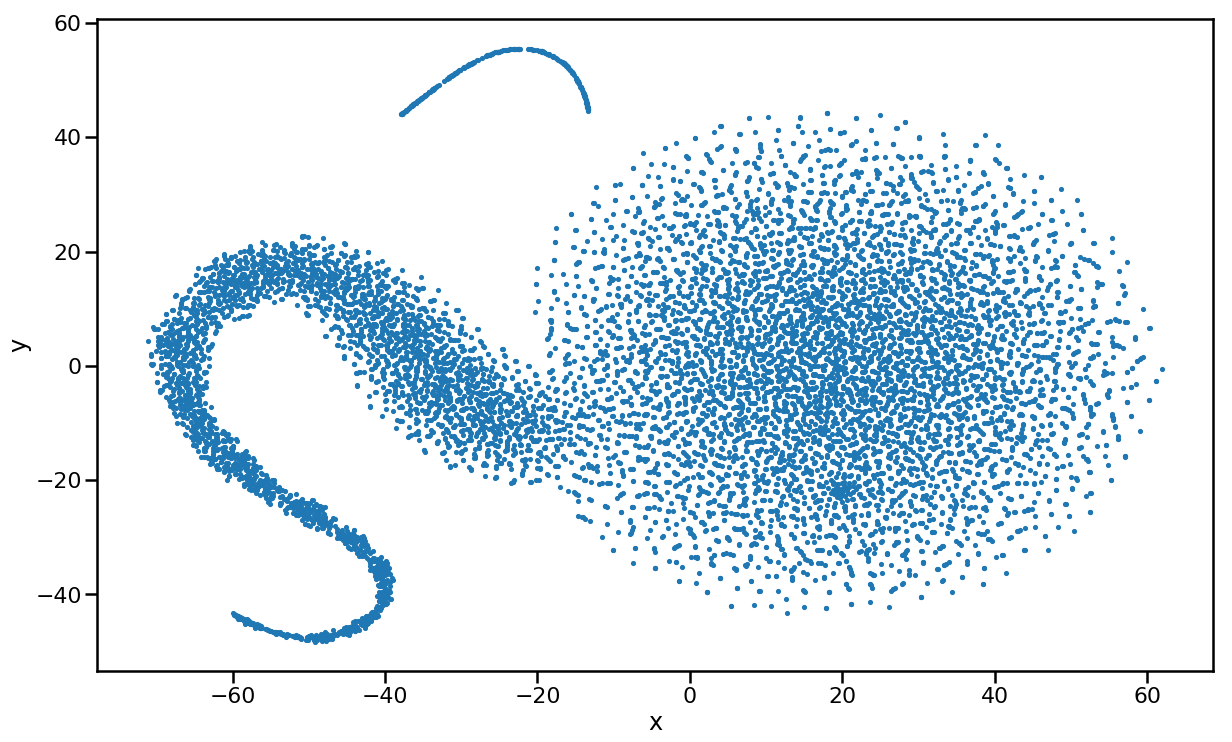

In [51]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [52]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

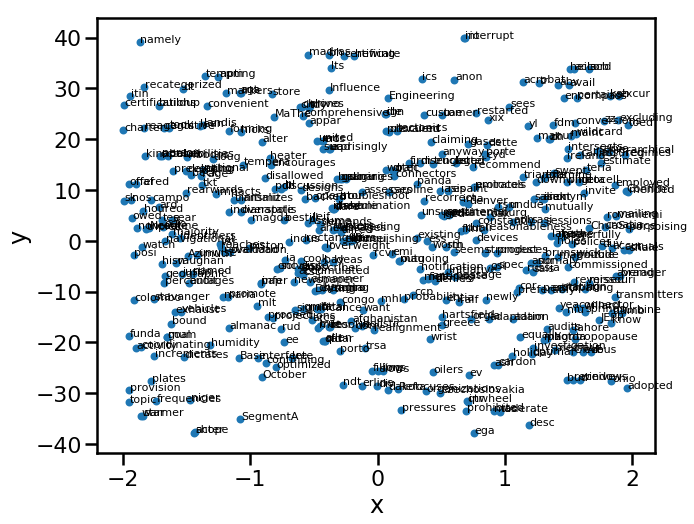

In [53]:
plot_region(x_bounds=(-2, 2), y_bounds=(-45, 50))

In [54]:
thrones2vec.wv.most_similar("aeroplane")

[('for', 0.9994180202484131),
 ('The', 0.9994139671325684),
 ('to', 0.9994043111801147),
 ('at', 0.9993710517883301),
 ('the', 0.9993612766265869),
 ('load', 0.9993605017662048),
 ('and', 0.9993549585342407),
 ('a', 0.999354898929596),
 ('are', 0.9993504285812378),
 ('with', 0.9993423223495483)]

In [55]:
x=thrones2vec.wv.most_similar_cosmul(
    positive=["weight","balance","air"],topn=10
)



ANN



In [56]:
from nltk.tokenize import sent_tokenize

In [57]:
print(files)

['14_holding_procedures.pdf', 'A320 321 FCTM Flight Crew Training Manual.pdf', 'ABCD-FE-01-00 Flight Envelope - v1 08.03.16.docx', 'ABCD-FL-57-00 - Wing Load Calculation - v1 08.03.16.docx', 'ABCD-WB-08-00 Weight and Balance Report - v1 08.03.16.docx', 'AERO_Q406.pdf', 'BendixKing KLN 89B.pdf', 'Compasses.ppt', 'Compasses.pptx', 'DO-178B.pdf', 'Embraer_190-Automatic_Flight_System.pdf', 'Fa12_ppt_DataComm.pptx', 'Falcon 20_Recurrent Manual.pdf', 'Falcon_7X-Air_Cond_and_Press.pdf', 'G200_JOEB_Report.pdf', 'GA_Proc.pdf', 'gulfstream_breakfast_minutes_111408.pdf', 'missed_approach.pptx', 'Principal Stresses.xlsx', 'Scott Messner, An Overview of RTCA DO-178B.pptx', 'waypoints.xls']


In [58]:
text = corpus_data
unique_chars = sorted(set(text.split()))

char_to_int = {}
int_to_char = {}

for i, c in enumerate (unique_chars):
    char_to_int.update({c: i})
    int_to_char.update({i: c})

In [59]:
char_to_int1 = {}
int_to_char1 = {}
for i, c in enumerate (files):
    char_to_int1.update({c: i})
    int_to_char1.update({i: c})

In [60]:
print(char_to_int1['ABCD-FE-01-00 Flight Envelope - v1 08.03.16.docx'])

2


In [61]:
# preparing input and output dataset
X = []
Y = []
tempcount = 0
for i in range(len(awlfiles)):
    for j in range(len(awlfiles[i])):
        #print(awl[i][j])
        l4 = sent_tokenize(awl[i][j])
        print(len(l4))
        for k in range(len(l4)):
            l5 = []
            for d in l4[k]:
                try:
                    l5.append(char_to_int[d])
                except:
                    pass
            if(len(l5)>10):
                l5 = l5[:10]
            else:
                for o in range(10-len(l5)):
                    l5.append(0)
            X.append(l5)
            Y.append(char_to_int1[awlfiles[i][j]])
        tempcount+=1
#print(X)

53
97
40
1
1
1
1
1
0
0
0
1
1
1
1
15
30
59
21
8


In [62]:
hey = len(X)
hey = hey//10
hey = hey*10
X = X[:hey]
Y = Y[:hey]

In [63]:
# reshaping, normalizing and one hot encoding
from keras.utils import np_utils
X_modified = numpy.reshape(X, (len(X), 10))
X_modified = X_modified / float(len(unique_chars))
Y_modified = np_utils.to_categorical(Y)
Y_modified

Using TensorFlow backend.


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [64]:
print(X_modified)

[[1.08911698e-01 1.02965135e-01 9.19680678e-02 ... 6.51678071e-04
  9.19680678e-02 9.89002933e-01]
 [7.52525253e-01 5.09938091e-01 6.45079831e-01 ... 6.45079831e-01
  5.09938091e-01 1.48989899e-01]
 [2.27517107e-01 6.45079831e-01 3.37732160e-01 ... 6.45079831e-01
  9.55197133e-01 5.09938091e-01]
 ...
 [3.37732160e-01 1.08911698e-01 6.51678071e-04 ... 6.45079831e-01
  8.47181492e-02 1.12414467e-02]
 [5.09938091e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.08911698e-01 6.45079831e-01 1.40436624e-01 ... 5.93027045e-02
  3.47833170e-02 6.27240143e-02]]


In [65]:
print(len(X))
print(len(Y))
print(len(X_modified))
print(len(Y_modified))
print(Y_modified.shape[1])

330
330
330
330
21


In [66]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [67]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=10))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(Y_modified.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [68]:
model.fit(X_modified, Y_modified, epochs=2000, batch_size=128)

Epoch 1/2000
330/330 [==============================] - 0s 1ms/step - loss: 3.0370 - acc: 0.1242
Epoch 2/2000
330/330 [==============================] - 0s 82us/step - loss: 3.0269 - acc: 0.1636
Epoch 3/2000
330/330 [==============================] - 0s 73us/step - loss: 3.0166 - acc: 0.2333
Epoch 4/2000
330/330 [==============================] - 0s 70us/step - loss: 3.0063 - acc: 0.2697
Epoch 5/2000
330/330 [==============================] - 0s 61us/step - loss: 2.9962 - acc: 0.2939
Epoch 6/2000
330/330 [==============================] - 0s 64us/step - loss: 2.9864 - acc: 0.2939
Epoch 7/2000
330/330 [==============================] - 0s 94us/step - loss: 2.9767 - acc: 0.2939
Epoch 8/2000
330/330 [==============================] - 0s 67us/step - loss: 2.9669 - acc: 0.2939
Epoch 9/2000
330/330 [==============================] - 0s 64us/step - loss: 2.9573 - acc: 0.2939
Epoch 10/2000
330/330 [==============================] - 0s 64us/step - loss: 2.9476 - acc: 0.2939
Epoch 11/2000
330/33

330/330 [==============================] - 0s 55us/step - loss: 1.9973 - acc: 0.2939
Epoch 165/2000
330/330 [==============================] - 0s 58us/step - loss: 1.9968 - acc: 0.2939
Epoch 166/2000
330/330 [==============================] - 0s 73us/step - loss: 1.9967 - acc: 0.2939
Epoch 167/2000
330/330 [==============================] - 0s 52us/step - loss: 1.9963 - acc: 0.2939
Epoch 168/2000
330/330 [==============================] - 0s 64us/step - loss: 1.9965 - acc: 0.2939
Epoch 169/2000
330/330 [==============================] - 0s 52us/step - loss: 1.9963 - acc: 0.2939
Epoch 170/2000
330/330 [==============================] - 0s 67us/step - loss: 1.9969 - acc: 0.2939
Epoch 171/2000
330/330 [==============================] - 0s 55us/step - loss: 1.9966 - acc: 0.2939
Epoch 172/2000
330/330 [==============================] - 0s 55us/step - loss: 1.9963 - acc: 0.2939
Epoch 173/2000
330/330 [==============================] - 0s 64us/step - loss: 1.9958 - acc: 0.2939
Epoch 174/2000


330/330 [==============================] - 0s 58us/step - loss: 1.9889 - acc: 0.2939
Epoch 247/2000
330/330 [==============================] - 0s 64us/step - loss: 1.9879 - acc: 0.2939
Epoch 248/2000
330/330 [==============================] - 0s 58us/step - loss: 1.9878 - acc: 0.2939
Epoch 249/2000
330/330 [==============================] - 0s 61us/step - loss: 1.9881 - acc: 0.2939
Epoch 250/2000
330/330 [==============================] - 0s 61us/step - loss: 1.9878 - acc: 0.2939
Epoch 251/2000
330/330 [==============================] - 0s 64us/step - loss: 1.9874 - acc: 0.2939
Epoch 252/2000
330/330 [==============================] - 0s 73us/step - loss: 1.9877 - acc: 0.2939
Epoch 253/2000
330/330 [==============================] - 0s 61us/step - loss: 1.9876 - acc: 0.2939
Epoch 254/2000
330/330 [==============================] - 0s 58us/step - loss: 1.9886 - acc: 0.2939
Epoch 255/2000
330/330 [==============================] - 0s 61us/step - loss: 1.9884 - acc: 0.2939
Epoch 256/2000


330/330 [==============================] - 0s 82us/step - loss: 1.9824 - acc: 0.2939
Epoch 329/2000
330/330 [==============================] - 0s 79us/step - loss: 1.9808 - acc: 0.2939
Epoch 330/2000
330/330 [==============================] - 0s 76us/step - loss: 1.9810 - acc: 0.2939
Epoch 331/2000
330/330 [==============================] - 0s 70us/step - loss: 1.9816 - acc: 0.2939
Epoch 332/2000
330/330 [==============================] - 0s 67us/step - loss: 1.9813 - acc: 0.2939
Epoch 333/2000
330/330 [==============================] - 0s 76us/step - loss: 1.9811 - acc: 0.2939
Epoch 334/2000
330/330 [==============================] - 0s 79us/step - loss: 1.9817 - acc: 0.2939
Epoch 335/2000
330/330 [==============================] - 0s 82us/step - loss: 1.9825 - acc: 0.2939
Epoch 336/2000
330/330 [==============================] - 0s 67us/step - loss: 1.9813 - acc: 0.2939
Epoch 337/2000
330/330 [==============================] - 0s 67us/step - loss: 1.9813 - acc: 0.2939
Epoch 338/2000


330/330 [==============================] - 0s 67us/step - loss: 1.9654 - acc: 0.2939
Epoch 490/2000
330/330 [==============================] - 0s 61us/step - loss: 1.9648 - acc: 0.2939
Epoch 491/2000
330/330 [==============================] - 0s 67us/step - loss: 1.9667 - acc: 0.2939
Epoch 492/2000
330/330 [==============================] - 0s 73us/step - loss: 1.9641 - acc: 0.2939
Epoch 493/2000
330/330 [==============================] - ETA: 0s - loss: 1.9681 - acc: 0.296 - 0s 67us/step - loss: 1.9643 - acc: 0.2939
Epoch 494/2000
330/330 [==============================] - 0s 85us/step - loss: 1.9634 - acc: 0.2939
Epoch 495/2000
330/330 [==============================] - 0s 88us/step - loss: 1.9630 - acc: 0.2939
Epoch 496/2000
330/330 [==============================] - 0s 67us/step - loss: 1.9633 - acc: 0.2939
Epoch 497/2000
330/330 [==============================] - 0s 70us/step - loss: 1.9630 - acc: 0.2939
Epoch 498/2000
330/330 [==============================] - 0s 67us/step - loss

330/330 [==============================] - 0s 70us/step - loss: 1.9206 - acc: 0.3030
Epoch 651/2000
330/330 [==============================] - 0s 67us/step - loss: 1.9190 - acc: 0.3030
Epoch 652/2000
330/330 [==============================] - 0s 82us/step - loss: 1.9183 - acc: 0.3030
Epoch 653/2000
330/330 [==============================] - 0s 70us/step - loss: 1.9201 - acc: 0.3091
Epoch 654/2000
330/330 [==============================] - 0s 64us/step - loss: 1.9182 - acc: 0.3030
Epoch 655/2000
330/330 [==============================] - 0s 70us/step - loss: 1.9179 - acc: 0.3030
Epoch 656/2000
330/330 [==============================] - 0s 70us/step - loss: 1.9190 - acc: 0.3030
Epoch 657/2000
330/330 [==============================] - 0s 61us/step - loss: 1.9176 - acc: 0.3030
Epoch 658/2000
330/330 [==============================] - 0s 67us/step - loss: 1.9169 - acc: 0.3030
Epoch 659/2000
330/330 [==============================] - 0s 64us/step - loss: 1.9175 - acc: 0.3061
Epoch 660/2000


330/330 [==============================] - 0s 88us/step - loss: 1.8740 - acc: 0.3424
Epoch 814/2000
330/330 [==============================] - 0s 79us/step - loss: 1.8741 - acc: 0.3394
Epoch 815/2000
330/330 [==============================] - 0s 73us/step - loss: 1.8749 - acc: 0.3394
Epoch 816/2000
330/330 [==============================] - 0s 70us/step - loss: 1.8733 - acc: 0.3394
Epoch 817/2000
330/330 [==============================] - 0s 61us/step - loss: 1.8753 - acc: 0.3364
Epoch 818/2000
330/330 [==============================] - 0s 67us/step - loss: 1.8741 - acc: 0.3455
Epoch 819/2000
330/330 [==============================] - 0s 64us/step - loss: 1.8739 - acc: 0.3333
Epoch 820/2000
330/330 [==============================] - 0s 64us/step - loss: 1.8731 - acc: 0.3394
Epoch 821/2000
330/330 [==============================] - 0s 70us/step - loss: 1.8729 - acc: 0.3394
Epoch 822/2000
330/330 [==============================] - 0s 167us/step - loss: 1.8732 - acc: 0.3394
Epoch 823/2000

330/330 [==============================] - 0s 61us/step - loss: 1.8468 - acc: 0.3394
Epoch 975/2000
330/330 [==============================] - 0s 79us/step - loss: 1.8466 - acc: 0.3515
Epoch 976/2000
330/330 [==============================] - 0s 73us/step - loss: 1.8444 - acc: 0.3424
Epoch 977/2000
330/330 [==============================] - ETA: 0s - loss: 1.7976 - acc: 0.320 - 0s 67us/step - loss: 1.8461 - acc: 0.3424
Epoch 978/2000
330/330 [==============================] - 0s 64us/step - loss: 1.8445 - acc: 0.3424
Epoch 979/2000
330/330 [==============================] - 0s 70us/step - loss: 1.8422 - acc: 0.3424
Epoch 980/2000
330/330 [==============================] - ETA: 0s - loss: 1.8802 - acc: 0.320 - 0s 70us/step - loss: 1.8439 - acc: 0.3424
Epoch 981/2000
330/330 [==============================] - 0s 64us/step - loss: 1.8456 - acc: 0.3394
Epoch 982/2000
330/330 [==============================] - 0s 61us/step - loss: 1.8415 - acc: 0.3485
Epoch 983/2000
330/330 [===============

330/330 [==============================] - 0s 79us/step - loss: 1.7993 - acc: 0.3576
Epoch 1136/2000
330/330 [==============================] - 0s 64us/step - loss: 1.8143 - acc: 0.3545
Epoch 1137/2000
330/330 [==============================] - 0s 67us/step - loss: 1.7985 - acc: 0.3545
Epoch 1138/2000
330/330 [==============================] - 0s 73us/step - loss: 1.7965 - acc: 0.3636
Epoch 1139/2000
330/330 [==============================] - 0s 70us/step - loss: 1.7958 - acc: 0.3545
Epoch 1140/2000
330/330 [==============================] - 0s 64us/step - loss: 1.7940 - acc: 0.3576
Epoch 1141/2000
330/330 [==============================] - 0s 70us/step - loss: 1.7946 - acc: 0.3606
Epoch 1142/2000
330/330 [==============================] - 0s 70us/step - loss: 1.7951 - acc: 0.3576
Epoch 1143/2000
330/330 [==============================] - 0s 70us/step - loss: 1.7953 - acc: 0.3545
Epoch 1144/2000
330/330 [==============================] - ETA: 0s - loss: 1.7267 - acc: 0.398 - 0s 67us/st

330/330 [==============================] - 0s 67us/step - loss: 1.7083 - acc: 0.4030
Epoch 1297/2000
330/330 [==============================] - 0s 58us/step - loss: 1.7439 - acc: 0.3788
Epoch 1298/2000
330/330 [==============================] - 0s 52us/step - loss: 1.7027 - acc: 0.4182
Epoch 1299/2000
330/330 [==============================] - 0s 58us/step - loss: 1.7000 - acc: 0.3970
Epoch 1300/2000
330/330 [==============================] - 0s 58us/step - loss: 1.7050 - acc: 0.3879
Epoch 1301/2000
330/330 [==============================] - 0s 64us/step - loss: 1.7954 - acc: 0.3576
Epoch 1302/2000
330/330 [==============================] - 0s 82us/step - loss: 1.7343 - acc: 0.3606
Epoch 1303/2000
330/330 [==============================] - 0s 58us/step - loss: 1.8101 - acc: 0.3333
Epoch 1304/2000
330/330 [==============================] - 0s 64us/step - loss: 1.7977 - acc: 0.3576
Epoch 1305/2000
330/330 [==============================] - 0s 67us/step - loss: 1.7281 - acc: 0.3909
Epoch 

330/330 [==============================] - 0s 70us/step - loss: 1.6259 - acc: 0.4242
Epoch 1457/2000
330/330 [==============================] - 0s 64us/step - loss: 1.6021 - acc: 0.4303
Epoch 1458/2000
330/330 [==============================] - 0s 61us/step - loss: 1.6089 - acc: 0.4455
Epoch 1459/2000
330/330 [==============================] - 0s 67us/step - loss: 1.6017 - acc: 0.4242
Epoch 1460/2000
330/330 [==============================] - 0s 67us/step - loss: 1.5979 - acc: 0.4303
Epoch 1461/2000
330/330 [==============================] - 0s 64us/step - loss: 1.6155 - acc: 0.4242
Epoch 1462/2000
330/330 [==============================] - 0s 70us/step - loss: 1.6425 - acc: 0.4152
Epoch 1463/2000
330/330 [==============================] - 0s 64us/step - loss: 1.6979 - acc: 0.4000
Epoch 1464/2000
330/330 [==============================] - 0s 67us/step - loss: 1.7122 - acc: 0.4030
Epoch 1465/2000
330/330 [==============================] - 0s 64us/step - loss: 1.6656 - acc: 0.4000
Epoch 

Epoch 1537/2000
330/330 [==============================] - 0s 58us/step - loss: 1.5919 - acc: 0.4333
Epoch 1538/2000
330/330 [==============================] - 0s 64us/step - loss: 1.7528 - acc: 0.3485
Epoch 1539/2000
330/330 [==============================] - 0s 58us/step - loss: 1.5467 - acc: 0.4515
Epoch 1540/2000
330/330 [==============================] - 0s 106us/step - loss: 1.5916 - acc: 0.4364
Epoch 1541/2000
330/330 [==============================] - 0s 61us/step - loss: 1.7597 - acc: 0.3545
Epoch 1542/2000
330/330 [==============================] - 0s 109us/step - loss: 1.7224 - acc: 0.3788
Epoch 1543/2000
330/330 [==============================] - 0s 112us/step - loss: 1.6273 - acc: 0.4000
Epoch 1544/2000
330/330 [==============================] - 0s 61us/step - loss: 1.5866 - acc: 0.4455
Epoch 1545/2000
330/330 [==============================] - 0s 61us/step - loss: 1.5540 - acc: 0.4515
Epoch 1546/2000
330/330 [==============================] - 0s 61us/step - loss: 1.5404 -

330/330 [==============================] - 0s 55us/step - loss: 1.4856 - acc: 0.4727
Epoch 1619/2000
330/330 [==============================] - 0s 58us/step - loss: 1.5979 - acc: 0.4273
Epoch 1620/2000
330/330 [==============================] - 0s 52us/step - loss: 1.7386 - acc: 0.3788
Epoch 1621/2000
330/330 [==============================] - 0s 55us/step - loss: 1.6043 - acc: 0.4273
Epoch 1622/2000
330/330 [==============================] - 0s 64us/step - loss: 1.5087 - acc: 0.4576
Epoch 1623/2000
330/330 [==============================] - 0s 58us/step - loss: 1.4923 - acc: 0.4788
Epoch 1624/2000
330/330 [==============================] - 0s 55us/step - loss: 1.4864 - acc: 0.4818
Epoch 1625/2000
330/330 [==============================] - 0s 58us/step - loss: 1.5116 - acc: 0.4758
Epoch 1626/2000
330/330 [==============================] - 0s 52us/step - loss: 1.8080 - acc: 0.3667
Epoch 1627/2000
330/330 [==============================] - 0s 55us/step - loss: 1.4960 - acc: 0.4576
Epoch 

330/330 [==============================] - 0s 58us/step - loss: 1.3816 - acc: 0.5152
Epoch 1779/2000
330/330 [==============================] - 0s 61us/step - loss: 1.3788 - acc: 0.5273
Epoch 1780/2000
330/330 [==============================] - 0s 52us/step - loss: 1.4314 - acc: 0.4818
Epoch 1781/2000
330/330 [==============================] - 0s 76us/step - loss: 1.5411 - acc: 0.4455
Epoch 1782/2000
330/330 [==============================] - 0s 61us/step - loss: 1.6233 - acc: 0.4030
Epoch 1783/2000
330/330 [==============================] - 0s 58us/step - loss: 1.8382 - acc: 0.3364
Epoch 1784/2000
330/330 [==============================] - 0s 64us/step - loss: 1.5168 - acc: 0.4545
Epoch 1785/2000
330/330 [==============================] - 0s 79us/step - loss: 1.3957 - acc: 0.5121
Epoch 1786/2000
330/330 [==============================] - 0s 67us/step - loss: 1.4289 - acc: 0.4909
Epoch 1787/2000
330/330 [==============================] - 0s 58us/step - loss: 1.5053 - acc: 0.4758
Epoch 

330/330 [==============================] - 0s 58us/step - loss: 1.2559 - acc: 0.5667
Epoch 1939/2000
330/330 [==============================] - 0s 58us/step - loss: 1.2411 - acc: 0.6091
Epoch 1940/2000
330/330 [==============================] - 0s 52us/step - loss: 1.3699 - acc: 0.4818
Epoch 1941/2000
330/330 [==============================] - 0s 52us/step - loss: 1.3677 - acc: 0.5273
Epoch 1942/2000
330/330 [==============================] - 0s 79us/step - loss: 1.3885 - acc: 0.5061
Epoch 1943/2000
330/330 [==============================] - 0s 55us/step - loss: 1.5578 - acc: 0.4152
Epoch 1944/2000
330/330 [==============================] - 0s 55us/step - loss: 1.3392 - acc: 0.5333
Epoch 1945/2000
330/330 [==============================] - 0s 55us/step - loss: 1.3904 - acc: 0.4848
Epoch 1946/2000
330/330 [==============================] - 0s 64us/step - loss: 1.4290 - acc: 0.5061
Epoch 1947/2000
330/330 [==============================] - 0s 61us/step - loss: 1.2585 - acc: 0.5576
Epoch 

In [69]:
def predictor(query):
    bleh = []
    for i in query:
        if i in thrones2vec.wv.vocab:
            bleh.append(i)
    query = bleh
    print(query)
    
    x=thrones2vec.wv.most_similar_cosmul(
        positive=query,topn=10
    )
    newq = []
    for i in range(len(x)):
        newq.append(x[i][0])
    ll1 = len(query)
    ll2 = len(newq)
    for i in range(ll2-ll1):
        query.append(newq[i])
    if(len(query)>10):
        query = query[:10]
        query = [char_to_int[char] for char in query]
    else:
        query = [char_to_int[char] for char in query]
        for i in range(10-len(query)):
            query.append(0)
    q1=[]
    q1.append(query)
    q = np.array(q1)
    #print(q.shape)
    q.reshape(1,10)
    x=argmax(model.predict(q))
    #print(x)
    #print(newq)
    print(files[x])
    gg = [int_to_char[char] for char in query]
    gg.insert(0,files[x])
    print(gg)
    return(gg)

In [70]:
finalarray = predictor(["vertical","mode","guidance"])
finaldoc = finalarray[0]
finalstr = ' '.join(finalarray[1:])
print(finaldoc)
print(finalstr)

['vertical', 'mode', 'guidance']
ABCD-WB-08-00 Weight and Balance Report - v1 08.03.16.docx
['ABCD-WB-08-00 Weight and Balance Report - v1 08.03.16.docx', 'vertical', 'mode', 'guidance', 'thrust', 'maximum', 'aircraft', 'for', 'that', 'the', 'speed']
ABCD-WB-08-00 Weight and Balance Report - v1 08.03.16.docx
vertical mode guidance thrust maximum aircraft for that the speed


In [71]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

In [72]:
def getData(finaldoc,finalstr):
    data= ' '
    for i in range(len(awlfiles)):
        for j in range(len(awlfiles[i])):
            if(awlfiles[i][j]==finaldoc):
                data = awl[i][j]
    #print(data)
    req = []
    senc = sent_tokenize(data)
    sents = []
    rat = []
    for i in range(len(senc)):
        sents.append(senc[i])
        r = fuzz.ratio(finalstr,senc[i])
        rat.append(r)
    for i in range(len(rat)):
        for j in range(len(rat)):
            if(rat[i]>rat[j]):
                rat[i],rat[j]=rat[j],rat[i]
                sents[i],sents[j]=sents[j],sents[i]
    for i in range(3):
        print(sents[i])

In [73]:
getData(finaldoc,finalstr)

It includes empty weight of the aircraft and the unusable amount of fuel.
In this aeroplane this weight equals the Maximum Take-off weight.
In this case the weight of the empty aircraft should be determined through estimation.
